In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

In [55]:
def displayImage(img):
    plt.imshow(img, cmap="gray")
    plt.show()
    
    
def display2Images(img1,img2):
    fig= plt.figure(figsize=(10,20))
    fig.add_subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.axis('off')
    plt.title("First")
    
    fig.add_subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.axis('off')
    plt.title("Second")
    plt.show()

# Task 1
Pick any 4 images of your own choice, merge them into 1 image containing the 4 images as 2X2 figure.

In [3]:
# Takes in ANY 4 images of any dimensions 
def concatImages(img1,img2,img3,img4):
    # Appropriate resizing based on first img1's dimensions
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
    img3 = cv2.resize(img3,(img1.shape[1], img1.shape[0]))
    img4 = cv2.resize(img4,(img1.shape[1], img1.shape[0]))
    
    # Gets dimensions of images and calculates the final width and height (concat Heigh and width)
    height = img1.shape[0]
    width = img1.shape[1]
    concatHeight = height * 2
    concatWidth = width * 2
    
    # Creating a numpy array of zeroes with the needed dimensions to fill up with image data
    concat = np.zeros((concatHeight, concatWidth) , dtype='uint8')
    concat[:height, :width] += img1
    concat[:height, width:concatWidth] += img2
    concat[height:concatHeight, 0:width] += img3
    concat[height:concatHeight, width:concatWidth] += img4
    displayImage(concat)
    
    

## Working Example

In [4]:
image1 = cv2.imread("./Images/art1.jpeg", 0)
image2 = cv2.imread("./Images/art2.jpeg", 0)
image3 = cv2.imread("./Images/art3.jpeg", 0)
image4 = cv2.imread("./Images/art4.jpeg", 0)

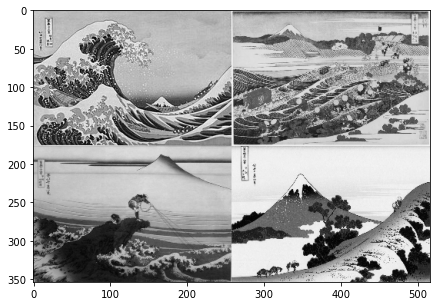

In [5]:
concatImages(image1, image2, image3, image4)

# --------------------------------------

# Task 2
Implement feature matching algorithms on any 2 images of your choice, you can find the algorithms in this link

### ORB Algorithm (with Brute Force matcher)

In [6]:
def FeatureMatchORB(img1,img2):
    # Creating the ORB detector then obtaining the keypoints and descriptors of each image
    orb = cv2.ORB_create()
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)
    
    # Applying Brute force matcher and getting an array of matches sorted ascending order
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1,des2)
    matches = sorted(matches, key = lambda x:x.distance)
    
    # Displaying 30 matches
    img3 = cv2.drawMatches(image1,kp1,image2,kp2,matches[:30],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    displayImage(img3)

### SIFT Algorithm (with Brute force matcher)

In [7]:
def FeatureMatchSIFT(img1, img2):
    # Creating the SIFT detector then obtaining keypoints and descriptors 
    sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)
    
    # Getting an array of matches using k nearest neigbors match method
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1,des2,k=2)
    
    # Applying ratio test highlighted by D.Lowe
    good = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])
    
    # Passes the good array as the array of matches to the drawMatchesKnn function
    img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    displayImage(img3)

#### **NOTE:** These same algorithms can be implemented using the FLANN based matcher instead of the brute force matcher 

## Working Examples

In [8]:
image1 = cv2.imread("./Images/feature2.jpg", 0)
image2 = cv2.imread("./Images/feature4.jpg", 0)

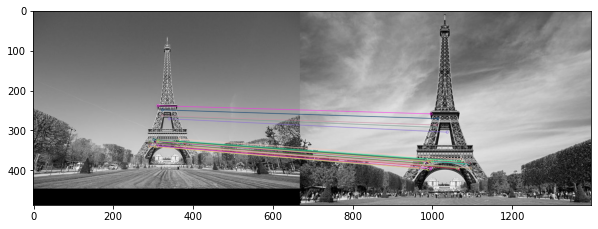

In [9]:
FeatureMatchORB(image1,image2)

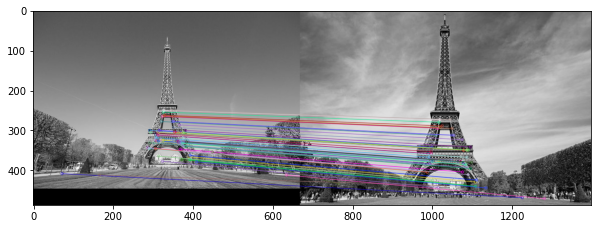

In [10]:
FeatureMatchSIFT(image1,image2)

# Questions
### 1. Which algorithm gets better results?
According my limited research and referencing this very useful paper https://arxiv.org/ftp/arxiv/papers/1710/1710.02726.pdf, the SIFT (Scale Invariant Feature Transform) algorithm seems to be the algorithm to use for better results in almost every case (better results in this case meaning higher matching rates) minus the special cases where the ORB (Oriented FAST and Rotated BRIEF) algorithm seems to outperform it slightly. However this comes with a caviat which I will discuss in the next question.

### 2. What is the time taken by the algorithms?
The caviat which comes with the SIFT algorithm being the one which yields the best results is that its the slowest of them all. The quickest one being the ORB algorithm. As highlighted in the paper I linked, ORB was consistently the one taking the least amount of time in each scenario while SIFT was the slowest and other algorithms like SURF were dancing in the middle.

So if minimising the time taken by the algorithm is the goal then ORB is the way to go, keeping in mind that you'd be losing accuracy.

### 3. Try changing the distance function in first algorithm and the number of Ks
Changing the distance function changes the way distance is computed between two features. Two common types were the NORM_L1 and NORM_L2 where L1 uses a kind of sum absolute values (like Manhattan distance) and L2 is a sum of square values. However when usig the ORB, the docs used NORM_HAMMING which uses Hamming distance and is aparently used only for binary descriptors such as BRIEF (used in ORB)

Changing the number of Ks just allows for a broader search (when it comes to increasing it) which might introduce inaccurate matches.

# --------------------------

# Task 3
Implement the TO_ZERO threshold using only Numpy.

In [135]:
# Setting any pixels that have a value less than the value given in 'thresh' to zero.
def toZero(img, thresh):
    img[img < thresh] = 0
    displayImage(img)

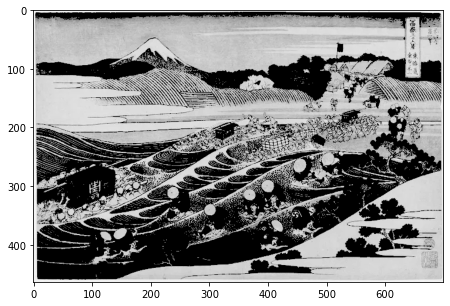

In [136]:
image = cv2.imread("./Images/art2.jpeg", 0)
toZero(image, 127)

# ------------------------------

# Task 4
Which from those is low-pass filter and which is high-pass filter, what does this mean?


#### Answer
Low Pass: Blurring

High Pass : Sharpening and Edge detection

Low pass filters are considered smoothing filters and thats what blurring is, it's smoothing out any sharp areas of the image by taking the average of neighboring pixels and thus this is considered to be a low pass filter. However high pass filters work on enhancing the high frequency components of the image and noise and edges are considered as high frequency thus sharpening and edge detection are both high pass filters.

# Task 5
Sharpen an Image.

In [61]:
def SharpenImage(img):
    kernel = np.array([[-1, -1, -1],
                      [-1, 9, -1],
                      [-1, -1, -1]])
    sharpened = cv2.filter2D(img, -1, kernel)
    # Display both side by side just to see the difference
    display2Images(img,sharpened)

In [130]:
image = cv2.imread("./Images/blurry.jpg", 0)

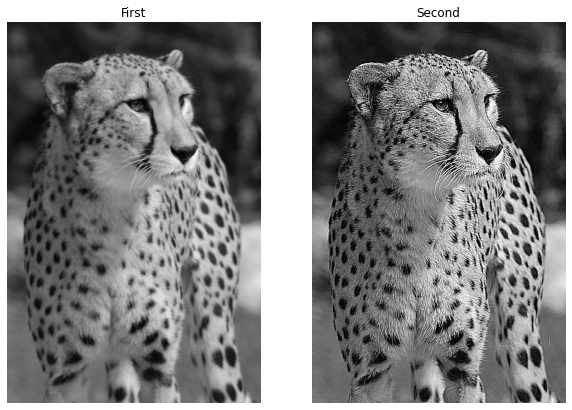

In [131]:
SharpenImage(image)

# Task 6
Implement Canny edge detection on your image and determine how you chose the arguments.

#### How to choose arguments:

The arguments of the canny edge detector are simple. The first argument is the input image, second and third arguments are min and max values. Meaning that anything that has an intensity lower than the min value wont be considered an edge and anything with an intensity higher than the max value will be considered as a sure edge. Points that are in the middle will only be an edge if they connect to sure edges. The last argument is the equation for finding gradient magnitude which is basically the mechanism by which it detects the edge (a large change in color is probably an edge).

In [127]:
def CannyDetect(img):
    edges = cv2.Canny(img,100,250,L2gradient=True)
    display2Images(img,edges)

In [133]:
image = cv2.imread('./Images/art3.jpeg',0)

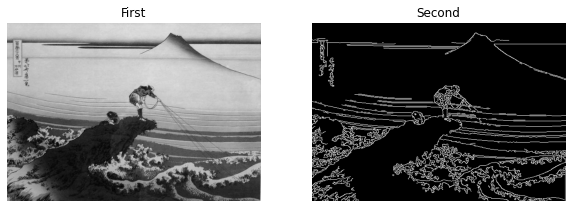

In [134]:
CannyDetect(image)